In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import importlib
from os.path import expanduser, join, basename
from os import walk

import task
importlib.reload(task)
from task import generate_trials

import train
importlib.reload(train)
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [114]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'single_module_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1'
model_dir=join(saving_path,model_name)


In [9]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)


Network based on single_module_TC_with_TRN weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(57, 50) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(50,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(50, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/single_module_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1/model.ckpt
Model hp restored.

Network based on single_module_TC_with_TRN weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(57, 50) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(50,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(50, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/single_module_TC_

In [4]:
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

24.0% of weights trained.


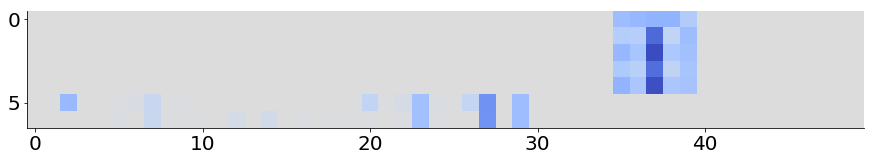

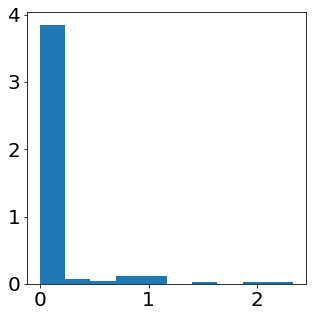

In [10]:
w_type = 'input'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


85.0% of weights trained.


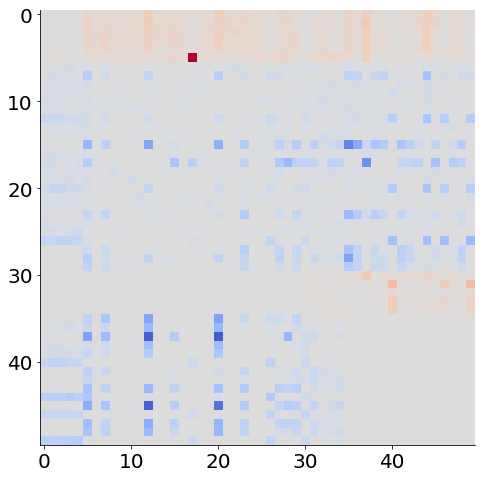

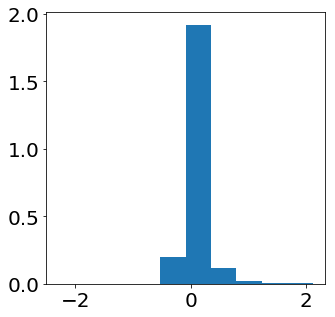

In [11]:
w_type = 'hidden'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


48.0% of weights trained.


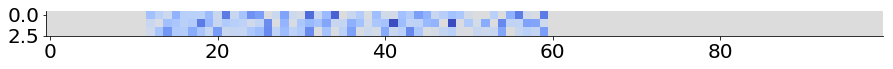

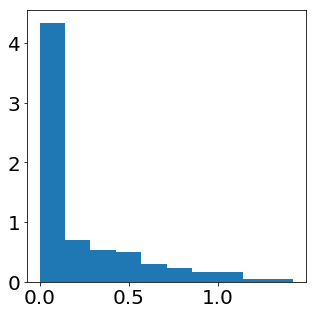

In [7]:
w_type = 'output'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0


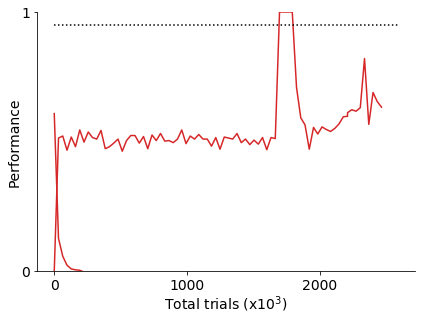

<Figure size 1080x432 with 0 Axes>

In [135]:
importlib.reload(mrnn)

#trained_models = [basename(x[0]) for x in walk(saving_path) if '_seed_' in x[0]]
#trained_models = ['full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_' + str(i) for i in range(3,4)] # if i != 3 and i != 5]
trained_models = ['smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0']

rules = ['contextdelaydm_MD_task_mod1']#, 'contextdelaydm_MD_task_mod2'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=None)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1


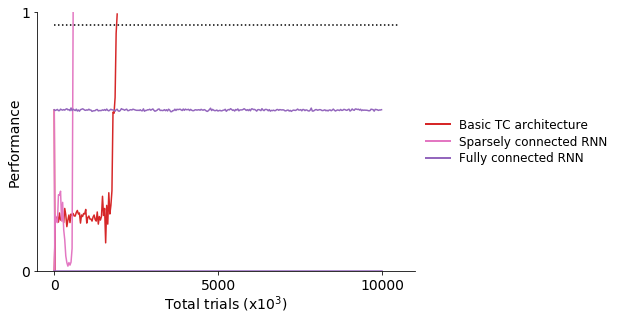

<Figure size 1080x432 with 0 Axes>

In [75]:
importlib.reload(mrnn)

trained_models = ['TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1'
                 ]

rules = ['contextdelaydm_MD_task_mod1'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

labels = ['Basic TC architecture',
          'Sparsely connected RNN',
          'Fully connected RNN'
         ]

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=labels)


In [6]:
importlib.reload(mrnn)
print(model_name)

rule = 'contextdelaydm_MD_task_mod1' #contextdelaydm1 multidelaydm contextdelaydm2

stim1_mod1 = np.array([1])
stim1_mod2 = np.array([0])
stim2_mod1 = np.array([0])
stim2_mod2 = np.array([0])

vanilla_RNN_shared_h_contextdelaydm_MD_task_relu_seed_0


In [35]:
n_rnn = 200
n_module = 5
prop_inh = 0.2

n_unit_mod = int(n_rnn/n_module)

subnetworks = [
    {'name': 'PFC',
     'index_range': range(0,n_unit_mod)
     #'pc_projections': 
    },
    {'name': 'Thalamus',
     'index_range': range(4*n_unit_mod+int(prop_inh*n_unit_mod),5*n_unit_mod)
    },
    {'name': 'TRN',
     'index_range': range(4*n_unit_mod,4*n_unit_mod+int(prop_inh*n_unit_mod))
    },
    {'name': 'Mod 1',
     'index_range': range(n_unit_mod,2*n_unit_mod)
    },
    {'name': 'Mod 2',
     'index_range': range(2*n_unit_mod,3*n_unit_mod)
    },
    {'name': 'Motor',
     'index_range': range(3*n_unit_mod,4*n_unit_mod)
    }
]

In [57]:
importlib.reload(mrnn)
subnetworks = mrnn.PCAs_on_subnetworks(model_dir, rule, stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subnetworks)

NameError: name 'subnetworks' is not defined

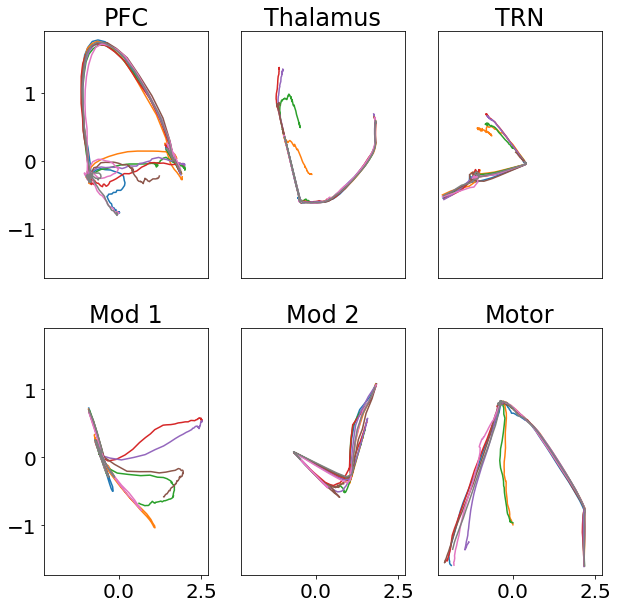

In [38]:
importlib.reload(mrnn)
mrnn.plot_subnetwork_PC_projections(subnetworks)

In [58]:
importlib.reload(mrnn)

params = mrnn.get_sensory_stim_params(stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, n_repats=10, single_loc=True)

dict_activations = mrnn.get_all_unit_activations(model_dir, rule, params, average_activations=False, pre_trial_rule='opp_random')



Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:440: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_no_shared_h_2C_contextdelaydm_MD_task_relu_seed_0/model.ckpt


In [59]:
activations = dict_activations['hidden']#[:, :, range(200)]

[-259.395556640625, 5447.306689453125]


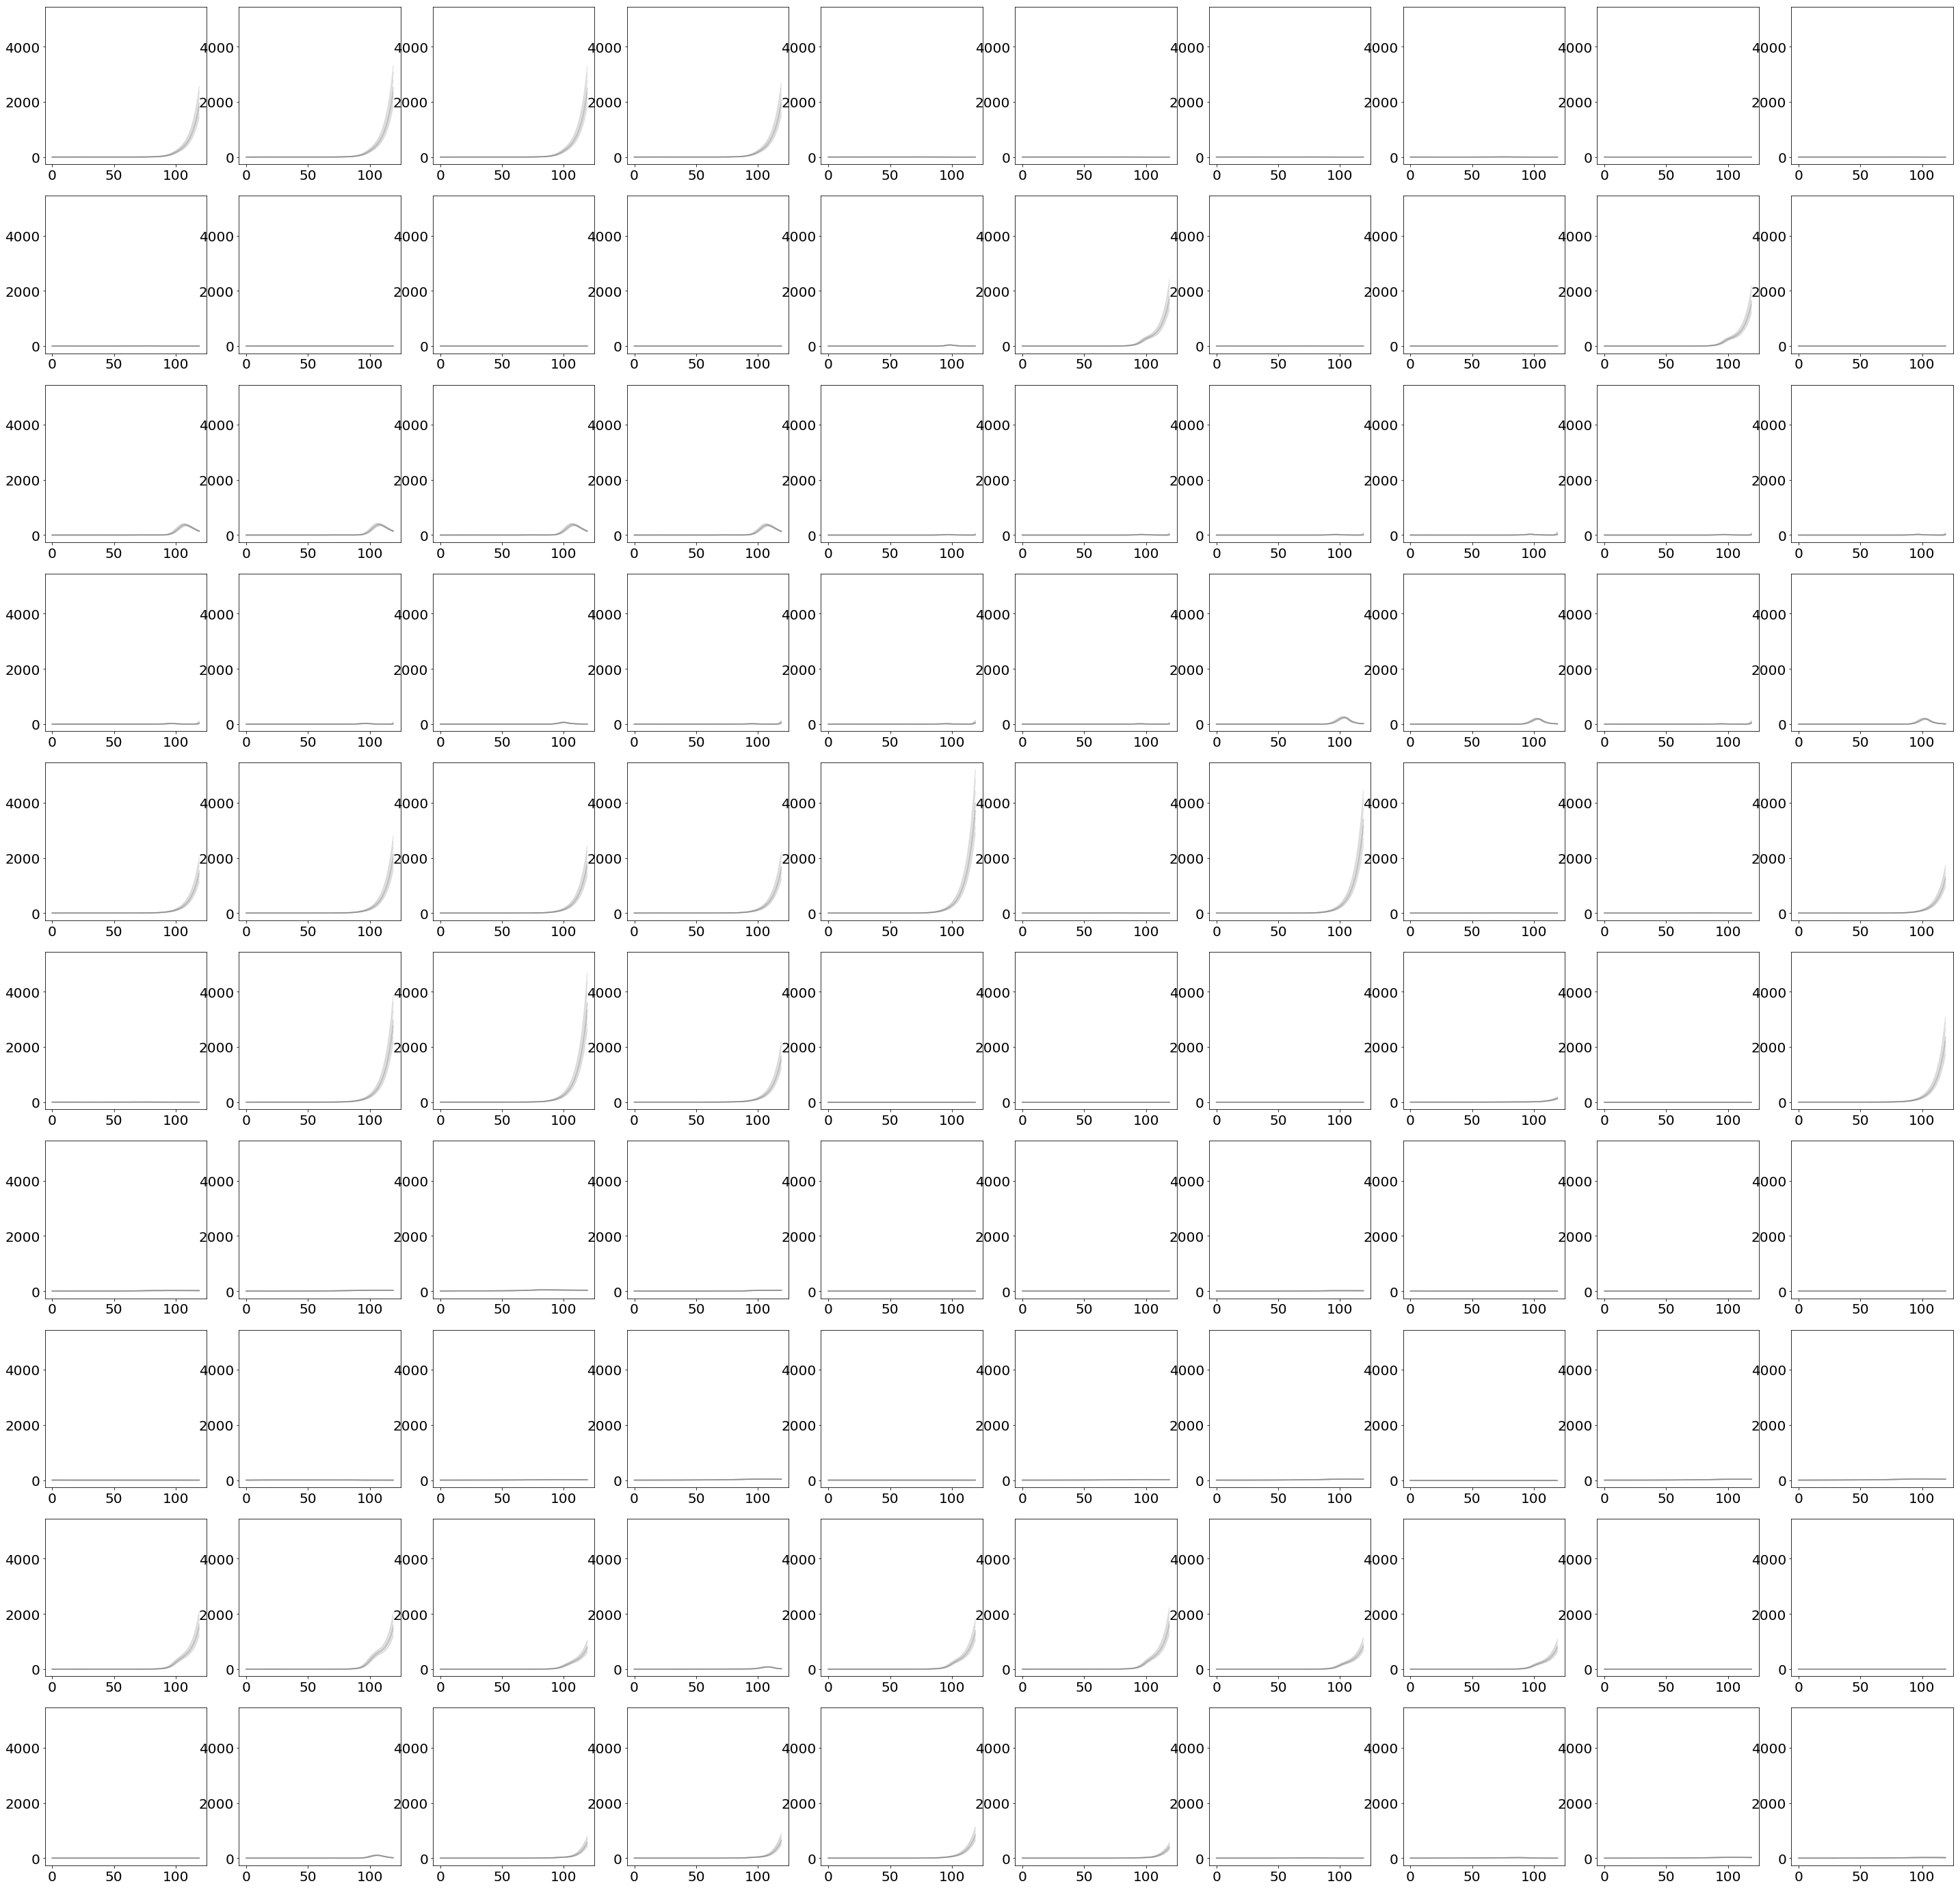

In [60]:
importlib.reload(mrnn)
mrnn.plot_unit_activations(activations)#, global_y_lims=[-0.99, 20.5])

In [24]:
units_to_lesion = range(50)

importlib.reload(mrnn)
perf_pre, perf_post = mrnn.perf_pre_post_lesion(model_dir, rule, units_to_lesion)

print('{:0.2f}% performance drop (from {:0.2f}% to {:0.2f}%)'.format(100*(perf_pre-perf_post), 
                                                                     100*perf_pre, 
                                                                     100*perf_post))


No weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/vanilla_RNN_shared_h_contextdelaydm_MD_task_relu_seed_0/model.ckpt
50.70% performance drop (from 100.00% to 49.30%)
